# Проект: Анализ оттока клиентов

## Материалы:
* [Презентация] (https://disk.yandex.ru/i/EqJD27APC7fGng)

- Описание проекта: в банке последнее время драматически повысился отток, это начинает становиться проблемой, которая угрожает существованию банка. Состав клиентов банка изменился и старые сегменты больше не подходят. Информация нужна менеджеру, который занимается маркетиновыми кампаниями и работает в тесной связке с менеджерами продуктов.
- Цель проекта: провести анализ, имеющихся данных о клиентах банка, и на их основе сделать рекомендации для решения проблемы оттока клиентов.

План работы:
- загрузка данных и изучение общей информации
- предобработка данных
- анализ данных
- проверка гипотез
- подготовка презентации и дашборда

## Загрузка данных и изучение общей информации

In [ ]:
#загрузка библиотек, необходимых для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
df = pd.read_csv(path)

In [ ]:
#таблица с данными
df

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


-В датасете представлены столбцы со следующими названиями:

 >userid — идентификатор пользователя,

>score — баллы кредитного скоринга,

>city — город,

>gender — пол,

>age — возраст,

>equity — приблизительная оценка собственности клиента,

>balance — баланс на счёте,

>products — количество продуктов, которыми пользуется клиент,

>credit_card — есть ли кредитная карта,

>last_activity — был ли клиент активен последнее время,

>salary — заработная плата клиента

>churn — уходит или нет.

In [ ]:
#информация о таблице с данными
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В данных имеется столбец с большим количеством пропусков, следует изучить возможность удалить эти пропуски или заполнить их средним/медианным значением, кроме того стоит заменить регистр в названии столбцов и поменять тип некоторых данных.

## Предобработка данных

In [ ]:
#приведем название столбцов к нижнему регистру
df.columns=df.columns.str.lower()

In [ ]:
#переименуем столбец userid в более удобное
df.rename(columns = {'userid':'user_id'}, inplace = True )

In [ ]:
#проверка изменений в названии столбцов
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [ ]:
#поменяем типы данных в столбцах
df['credit_card'] = df['credit_card'].astype(bool)
df['last_activity'] = df['last_activity'].astype(bool)
df['churn'] = df['churn'].astype(bool)

In [ ]:
#проверка изменений в таблице
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,False,True,75719.14,True
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,True,False,86621.77,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,True,True,107683.34,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,False,True,174423.53,True
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,True,False,67353.16,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,False,True,18943.64,False
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,True,False,196898.29,False
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,True,True,108905.09,False
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,False,True,86874.90,False


In [ ]:
#проверка на явные дубликами
df.duplicated().sum()

0

In [ ]:
#удаление явных дубликатов
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
#проверка удалились ли явные дубликаты
df.duplicated().sum()

0

In [ ]:
#проверка на пропуски в данных
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [ ]:
#выявление возможности удалить пропуски или заполнить их средним/медианным значением
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
balance,2295,0.23
age,26,0.00
user_id,0,0.00
score,0,0.00
city,0,0.00
gender,0,0.00
equity,0,0.00
products,0,0.00
credit_card,0,0.00
last_activity,0,0.00


В данных количество пропусков превышает 10%, восполнение пропусков результатами расчета среднего/медианы по столбцу, может привести к искажению данных, поэтому оставим пропуски, предположительно возникшие из-за технической ошибки.

In [ ]:
#описательная статистика по данным в таблице
df.describe()

,user_id,score,age,equity,balance,products,est_salary
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,1.000000e+04
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,1.478669e+05
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,1.393885e+05
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,2.546300e+03
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,7.525190e+04
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.196581e+05
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.745005e+05
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.395064e+06


### Категоризация данных

#### Категоризация клиентов по возрасту

In [ ]:
#описательная статистика для столбца, чтобы определить для него категории
df['age'].describe()

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

In [ ]:
#функция для категоризации данных
def categorize_age(income):
    try:
        if 18 <= income <= 35:
            return 'молодой'
        elif 36 <= income <= 60:
            return 'взрослый'
        elif income >= 61:
            return 'старый'
    except:
        pass

In [ ]:
#применение функции для категоризации данных в таблице
df['age_category'] = df['age'].apply(categorize_age)

In [ ]:
#проверка создания столбца с категориями
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_category
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,False,True,75719.14,True,молодой
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,True,False,86621.77,False,взрослый
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,True,True,107683.34,False,молодой
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,False,True,174423.53,True,взрослый
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,True,False,67353.16,True,молодой
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,False,True,18943.64,False,молодой
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,True,False,196898.29,False,взрослый
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,True,True,108905.09,False,молодой
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,False,True,86874.90,False,старый


#### Категоризация клиентов по заработной плате

In [ ]:
#описательная статистика для столбца, чтобы определить для него категории
df['est_salary'].describe()

count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [ ]:
#функция для категоризации данных
def categorize_est_salary(income):
    try:
        if  income <= 50000:
            return 'низкий достаток'
        elif 50001 <= income <= 100000:
            return 'средний достаток'
        elif income >= 100001:
            return 'высокий достаток'
    except:
        pass

In [ ]:
#применение функции для категоризации данных в таблице и проверка создания столбца с категориями
df['est_salary_category'] = df['est_salary'].apply(categorize_est_salary)
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_category,est_salary_category
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,False,True,75719.14,True,молодой,средний достаток
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,True,False,86621.77,False,взрослый,средний достаток
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,True,True,107683.34,False,молодой,высокий достаток
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,False,True,174423.53,True,взрослый,высокий достаток
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,True,False,67353.16,True,молодой,средний достаток
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,False,True,18943.64,False,молодой,низкий достаток
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,True,False,196898.29,False,взрослый,высокий достаток
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,True,True,108905.09,False,молодой,высокий достаток
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,False,True,86874.90,False,старый,средний достаток


#### Категоризация клиентов по количеству используемых продуктов

In [ ]:
#описательная статистика для столбца, чтобы определить для него категории
df['products'].describe()

count    10000.000000
mean         1.870100
std          0.792647
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64

In [ ]:
#чтобы категоризовать, посмотрим уникальные значения в столбце
df['products'].unique()

array([2, 3, 1, 4, 5, 0])

In [ ]:
#функция для категоризации данных
def categorize_products(income):
    try:
        if  income <= 0:
            return 'нет продуктов'
        elif 1 <= income <= 2:
            return '1-2 продукта'
        elif income >= 3:
            return '3-5 продуктов'
    except:
        pass

In [ ]:
#применение функции для категоризации данных в таблице и проверка создания столбца с категориями
df['products_category'] = df['products'].apply(categorize_products)
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_category,est_salary_category,products_category
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,False,True,75719.14,True,молодой,средний достаток,1-2 продукта
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,True,False,86621.77,False,взрослый,средний достаток,3-5 продуктов
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,True,True,107683.34,False,молодой,высокий достаток,1-2 продукта
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,False,True,174423.53,True,взрослый,высокий достаток,1-2 продукта
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,True,False,67353.16,True,молодой,средний достаток,1-2 продукта
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,False,True,18943.64,False,молодой,низкий достаток,1-2 продукта
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,True,False,196898.29,False,взрослый,высокий достаток,1-2 продукта
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,True,True,108905.09,False,молодой,высокий достаток,1-2 продукта
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,False,True,86874.90,False,старый,средний достаток,3-5 продуктов


#### Категоризация клиентов по банковскому скорингу

In [ ]:
#описательная статистика для столбца, чтобы определить для него категории
df['score'].describe()

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

In [ ]:
#функция для категоризации данных
def categorize_score(income):
    try:
        if  income <= 595:
            return 'очень плохой'
        elif 596 <= income <= 765:
            return 'плохой'
        elif 766 <= income <= 895:
            return 'средний'
        elif 896<= income <= 950:
            return 'хороший'
        elif income >= 951:
            return 'очень хороший'
    except:
        pass

In [ ]:
#применение функции для категоризации данных в таблице и проверка создания столбца с категориями
df['score_category'] = df['score'].apply(categorize_score)
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_category,est_salary_category,products_category,score_category
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,False,True,75719.14,True,молодой,средний достаток,1-2 продукта,средний
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,True,False,86621.77,False,взрослый,средний достаток,3-5 продуктов,средний
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,True,True,107683.34,False,молодой,высокий достаток,1-2 продукта,средний
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,False,True,174423.53,True,взрослый,высокий достаток,1-2 продукта,средний
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,True,False,67353.16,True,молодой,средний достаток,1-2 продукта,плохой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,False,True,18943.64,False,молодой,низкий достаток,1-2 продукта,средний
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,True,False,196898.29,False,взрослый,высокий достаток,1-2 продукта,средний
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,True,True,108905.09,False,молодой,высокий достаток,1-2 продукта,хороший
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,False,True,86874.90,False,старый,средний достаток,3-5 продуктов,средний


#### Категоризация клиентов по балансу на счете

In [ ]:
#описательная статистика для столбца, чтобы определить для него категории
df['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

<AxesSubplot:>

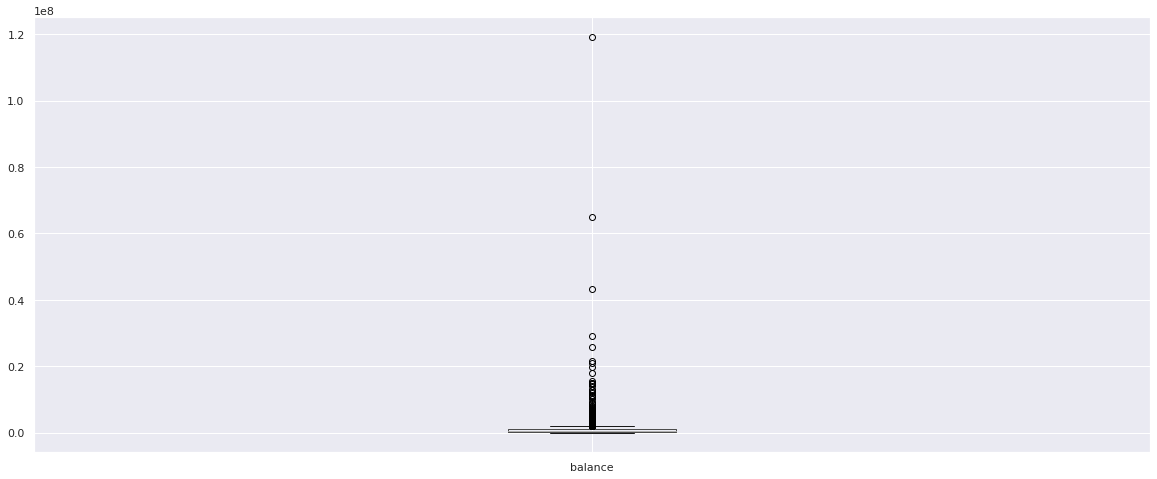

In [ ]:
#так как разница междц макс и мин значением большая, посмотрим как распределены значения
df.boxplot(column=['balance'])

In [ ]:
#функция для категоризации данных
def categorize_balance(income):
    try:
        if  income <=10000:
            return 'менее 10000'
        elif 10001<= income <= 50000:
            return '10000-50000'
        elif 50001<= income <= 100000:
            return '50000-100000'
        elif income >= 100001:
            return 'более 100000'
    except:
        pass

In [ ]:
#применение функции для категоризации данных в таблице и проверка создания столбца с категориями
df['balance_category'] = df['balance'].apply(categorize_balance)
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_category,est_salary_category,products_category,score_category,balance_category
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,False,True,75719.14,True,молодой,средний достаток,1-2 продукта,средний,50000-100000
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,True,False,86621.77,False,взрослый,средний достаток,3-5 продуктов,средний,более 100000
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,True,True,107683.34,False,молодой,высокий достаток,1-2 продукта,средний,None
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,False,True,174423.53,True,взрослый,высокий достаток,1-2 продукта,средний,более 100000
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,True,False,67353.16,True,молодой,средний достаток,1-2 продукта,плохой,менее 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,False,True,18943.64,False,молодой,низкий достаток,1-2 продукта,средний,50000-100000
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,True,False,196898.29,False,взрослый,высокий достаток,1-2 продукта,средний,None
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,True,True,108905.09,False,молодой,высокий достаток,1-2 продукта,хороший,None
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,False,True,86874.90,False,старый,средний достаток,3-5 продуктов,средний,более 100000


Были введены категории для некоторых столбцов, критерии разделения по категориям были выбраны исходя из логики.

## Анализ данных

### Есть ли зависимость между полом и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и пола клиента
df_1=df.groupby(['gender','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,gender,churn,user_id
0,Ж,False,4358
1,М,False,3822
2,М,True,1183
3,Ж,True,637


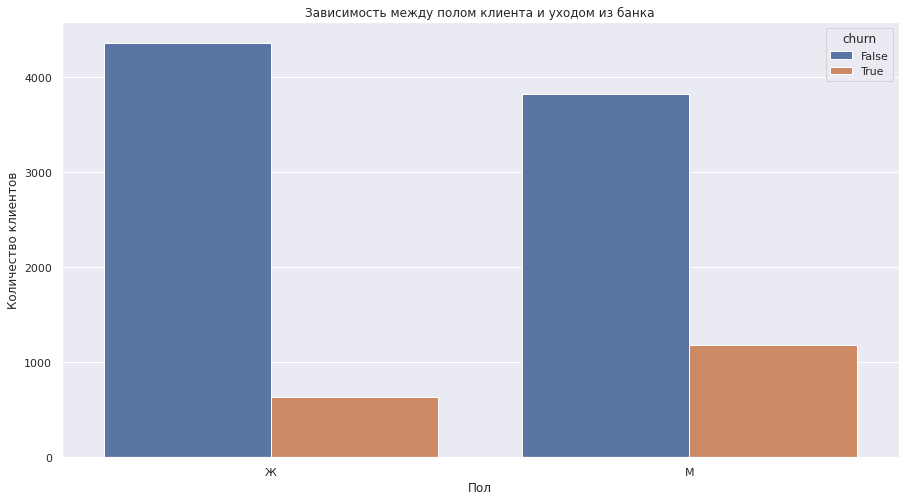

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='gender', y='user_id', hue='churn')
ax.set_title('Зависимость между полом клиента и уходом из банка')
ax.set_xlabel('Пол')
ax.set_ylabel('Количество клиентов')
plt.show()

По графику видно, что преимущественно уходящие клиенты являются лицами мужского пола. Большая часть оставшихся клиентов является лицами женского пола.

### Есть ли зависимость между городом и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и города клиента
df_1=df.groupby(['city','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,city,churn,user_id
0,Ярославль,False,4771
1,Рыбинск,False,2258
2,Ростов,False,1151
3,Ярославль,True,1117
4,Рыбинск,True,437
5,Ростов,True,266


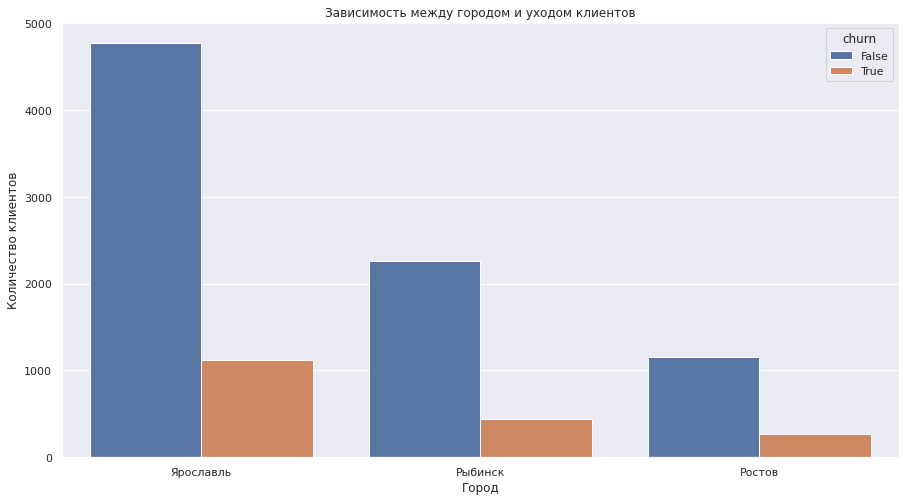

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='city', y='user_id', hue='churn')
ax.set_title('Зависимость между городом и уходом клиентов')
ax.set_xlabel('Город')
ax.set_ylabel('Количество клиентов')
plt.show()

In [ ]:
#посмотрим в процентном соотношении количество оставшихся/ушедших для всех клиентов банка для Ярославля
ya=df[df['city']=='Ярославль']['user_id'].count()
df_1_1=df_1.loc[df_1['city']=='Ярославль']
df_1_1['per_of_all']=df_1_1['user_id']/ya*100
df_1_1

/tmp/ipykernel_31/851634908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_1['per_of_all']=df_1_1['user_id']/ya*100


,city,churn,user_id,per_of_all
0,Ярославль,False,4771,81.029212
3,Ярославль,True,1117,18.970788


In [ ]:
#посмотрим в процентном соотношении количество оставшихся/ушедших для всех клиентов банка для Рыбинска
rb=df[df['city']=='Рыбинск']['user_id'].count()
df_1_2=df_1.loc[df_1['city']=='Рыбинск']
df_1_2['per_of_all']=df_1_2['user_id']/rb*100
df_1_2

/tmp/ipykernel_31/3246008514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_2['per_of_all']=df_1_2['user_id']/rb*100


,city,churn,user_id,per_of_all
1,Рыбинск,False,2258,83.784787
4,Рыбинск,True,437,16.215213


In [ ]:
#посмотрим в процентном соотношении количество оставшихся/ушедших для всех клиентов банка для Ростова
ro=df[df['city']=='Ростов']['user_id'].count()
df_1_3=df_1.loc[df_1['city']=='Ростов']
df_1_3['per_of_all']=df_1_3['user_id']/ro*100
df_1_3

/tmp/ipykernel_31/1415092356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_3['per_of_all']=df_1_3['user_id']/ro*100


,city,churn,user_id,per_of_all
2,Ростов,False,1151,81.227946
5,Ростов,True,266,18.772054


In [ ]:
#объеденим полученные данные в одну таблицу
daf1 = df_1_1.merge(df_1_2, on='churn', how='left')
daf=daf1.merge(df_1_3, on='churn', how='left')
daf

,city_x,churn,user_id_x,per_of_all_x,city_y,user_id_y,per_of_all_y,city,user_id,per_of_all
0,Ярославль,False,4771,81.029212,Рыбинск,2258,83.784787,Ростов,1151,81.227946
1,Ярославль,True,1117,18.970788,Рыбинск,437,16.215213,Ростов,266,18.772054


Больше всего клиентов уходит из банков в Ярославле, с другой стороны, больше всего клиентов остается в банках Ярославля. В процентном соотношении в Ярославле больше всего процент ушедших клиентов ко всем клиентам банка, а в Рыбинске данный показатель самый маленький.

### Есть ли зависимость между возрастом и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и возраста клиента
df_1=df.groupby(['age_category','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,age_category,churn,user_id
0,взрослый,False,4594
1,молодой,False,2595
2,взрослый,True,1056
3,старый,False,966
4,молодой,True,696
5,старый,True,67


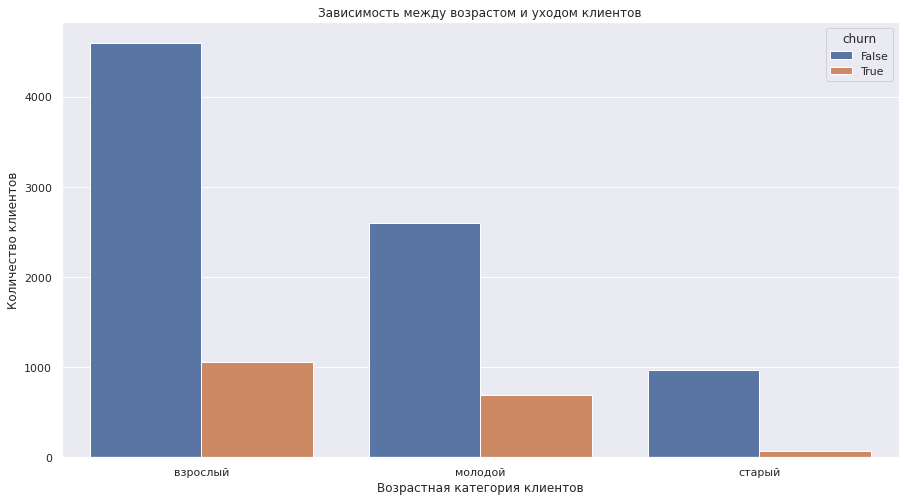

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='age_category', y='user_id', hue='churn')
ax.set_title('Зависимость между возрастом и уходом клиентов')
ax.set_xlabel('Возрастная категория клиентов')
ax.set_ylabel('Количество клиентов')
plt.show()

Больше всего уходит клиентов, относящихся к категории "взрослый"(возраст 36-60 лет), меньше всего уходит клиентов, относящихся к категории "старый"(возраст более 61 года).
Больше всего остается клиентов, относящихся к категории "взрослый"(возраст 36-60 лет).

### Есть ли зависимость между количеством продуктов и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и количеству используемых продуктов у клиента
df_1=df.groupby(['products_category','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,products_category,churn,user_id
0,1-2 продукта,False,7253
1,1-2 продукта,True,1214
2,3-5 продуктов,False,927
3,3-5 продуктов,True,605
4,нет продуктов,True,1


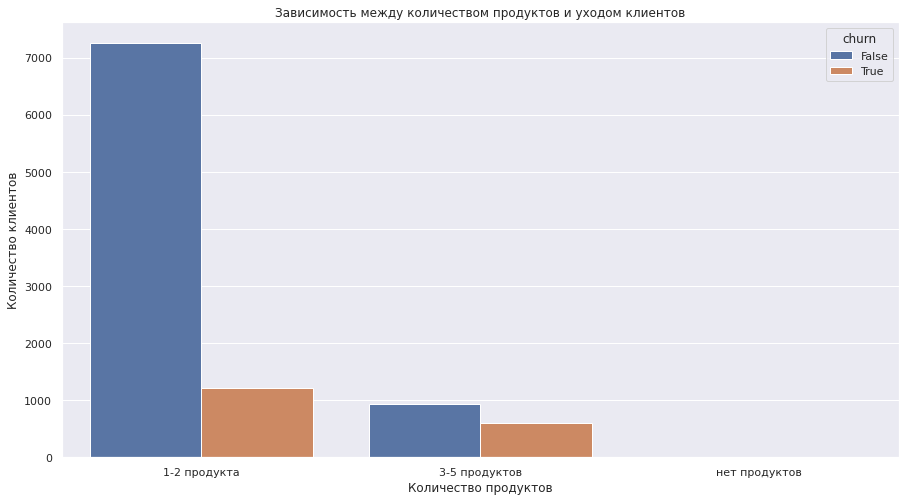

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='products_category', y='user_id', hue='churn')
ax.set_title('Зависимость между количеством продуктов и уходом клиентов')
ax.set_xlabel('Количество продуктов')
ax.set_ylabel('Количество клиентов')
plt.show()

Больше всего уходит клиентов, пользующихся 1-2 подуктами, также их больше всего и остается в банке(по количественным критериям). В процентном соотношении больше всего уходит клиентов, пользующихся 3-5 продуктами.

### Есть ли зависимость между баллом кредитного скоринга и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и банковского скоринга клиента
df_1=df.groupby(['score_category','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,score_category,churn,user_id
0,средний,False,4938
1,хороший,False,1912
2,средний,True,1275
3,плохой,False,975
4,хороший,True,442
5,очень хороший,False,355
6,очень хороший,True,56
7,плохой,True,47


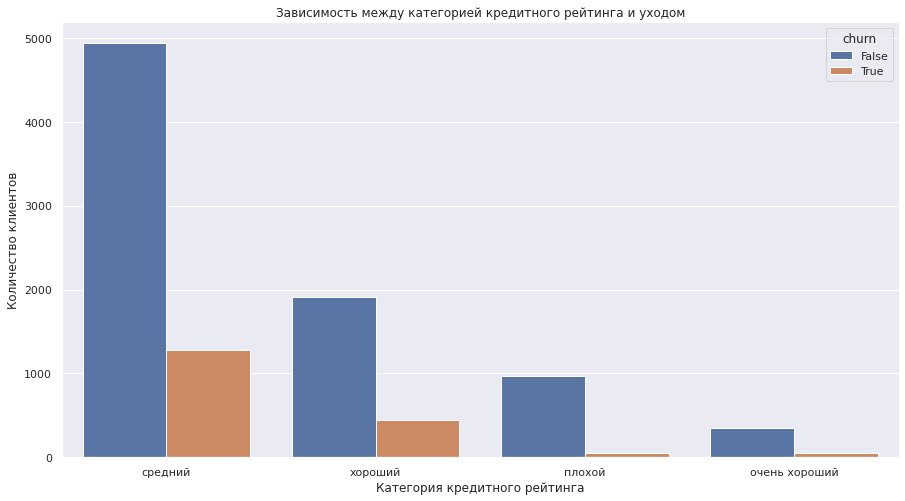

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='score_category', y='user_id', hue='churn')
ax.set_title('Зависимость между категорией кредитного рейтинга и уходом')
ax.set_xlabel('Категория кредитного рейтинга')
ax.set_ylabel('Количество клиентов')
plt.show()

Больше всего уходит клиентов со средним рейтингом, а меньше всего уходит клиентов с очень хорошим и плохим рейтингами.

### Есть ли зависимость между активностью клиента в последнее время и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и последней активности клиента
df_1=df.groupby(['last_activity','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,last_activity,churn,user_id
0,False,False,4223
1,True,False,3957
2,True,True,1278
3,False,True,542


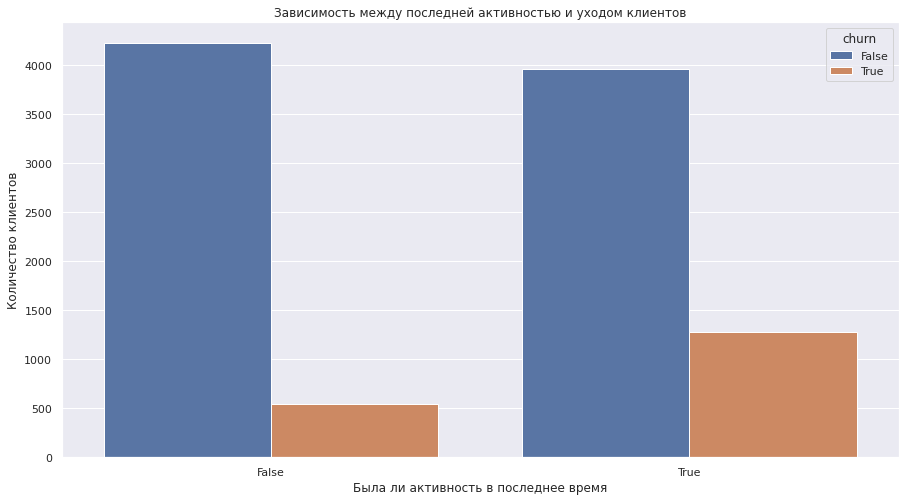

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='last_activity', y='user_id', hue='churn')
ax.set_title('Зависимость между последней активностью и уходом клиентов')
ax.set_xlabel('Была ли активность в последнее время')
ax.set_ylabel('Количество клиентов')
plt.show()

По графику видно, что в основном уходят клиенты, которые были активны в последнее время.

### Есть ли зависимость между наличием кредитной карты и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и наличии кредитной карты у клиента
df_1=df.groupby(['credit_card','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,credit_card,churn,user_id
0,True,False,5801
1,False,False,2379
2,True,True,1003
3,False,True,817


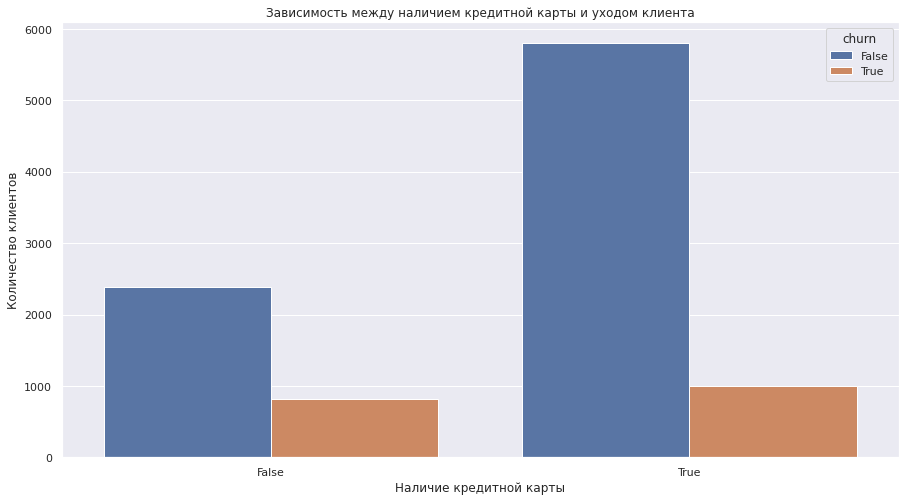

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='credit_card', y='user_id', hue='churn')
ax.set_title('Зависимость между наличием кредитной карты и уходом клиента')
ax.set_xlabel('Наличие кредитной карты')
ax.set_ylabel('Количество клиентов')
plt.show()

Больше всего уходит клиентов имеющих кредитную карту.

### Есть ли зависимость между уровнем дохода и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и уровню дохода клиента
df_1=df.groupby(['est_salary_category','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,est_salary_category,churn,user_id
0,высокий достаток,False,4872
1,средний достаток,False,2283
2,высокий достаток,True,1194
3,низкий достаток,False,1025
4,средний достаток,True,451
5,низкий достаток,True,175


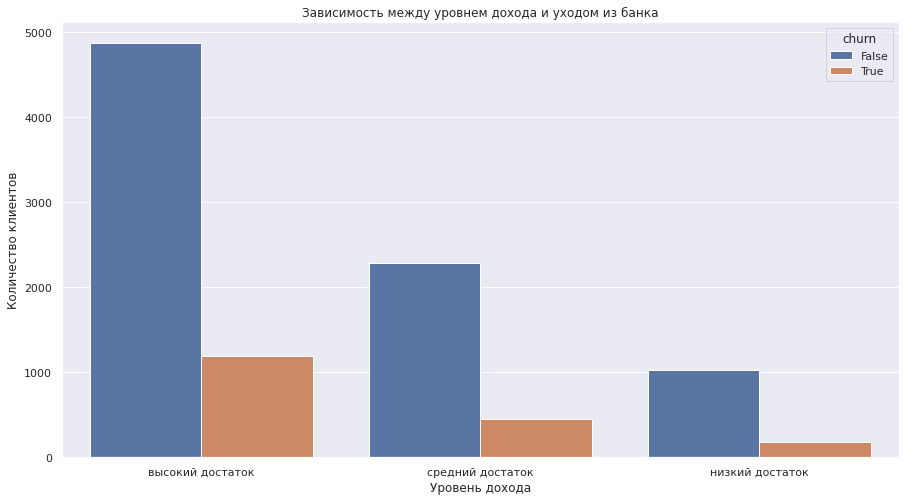

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='est_salary_category', y='user_id', hue='churn')
ax.set_title('Зависимость между уровнем дохода и уходом из банка')
ax.set_xlabel('Уровень дохода')
ax.set_ylabel('Количество клиентов')
plt.show()

Больше всего уходит клиентов, имеющих высокий уровень дохода.

### Есть ли зависимость между балансом на карте и уходом клиентов

In [ ]:
#таблица с группировкой по признаку ухода и баланса на карте клиента
df_1=df.groupby(['balance_category','churn']).agg({'user_id': 'count'})
df_1=df_1.sort_values(by='user_id', ascending=False).reset_index()
df_1

,balance_category,churn,user_id
0,более 100000,False,5571
1,более 100000,True,1749
2,50000-100000,False,194
3,10000-50000,False,85
4,менее 10000,False,48
5,50000-100000,True,27
6,10000-50000,True,25
7,менее 10000,True,6


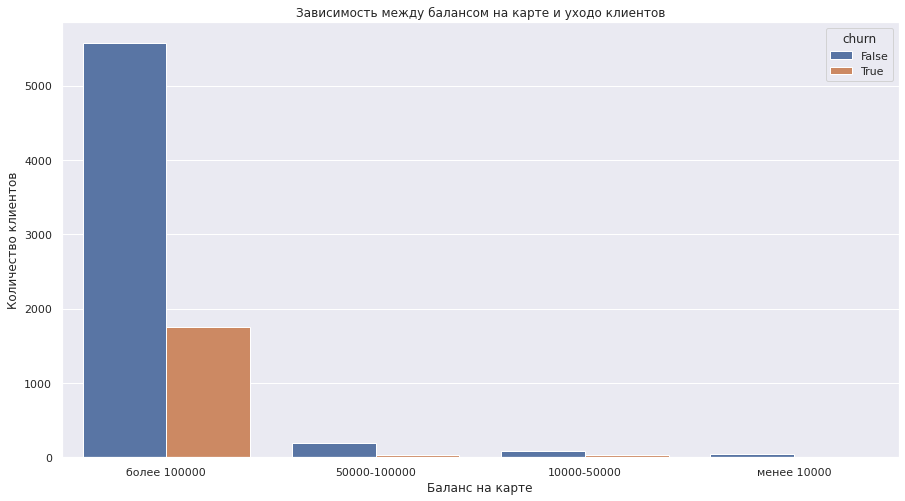

In [ ]:
#графическое представление
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df_1, x='balance_category', y='user_id', hue='churn')
ax.set_title('Зависимость между балансом на карте и уходо клиентов')
ax.set_xlabel('Баланс на карте')
ax.set_ylabel('Количество клиентов')
plt.show()

В основном уходят клиенты с балансом на карте более 100000.

### Матрица корреляций

<AxesSubplot:>

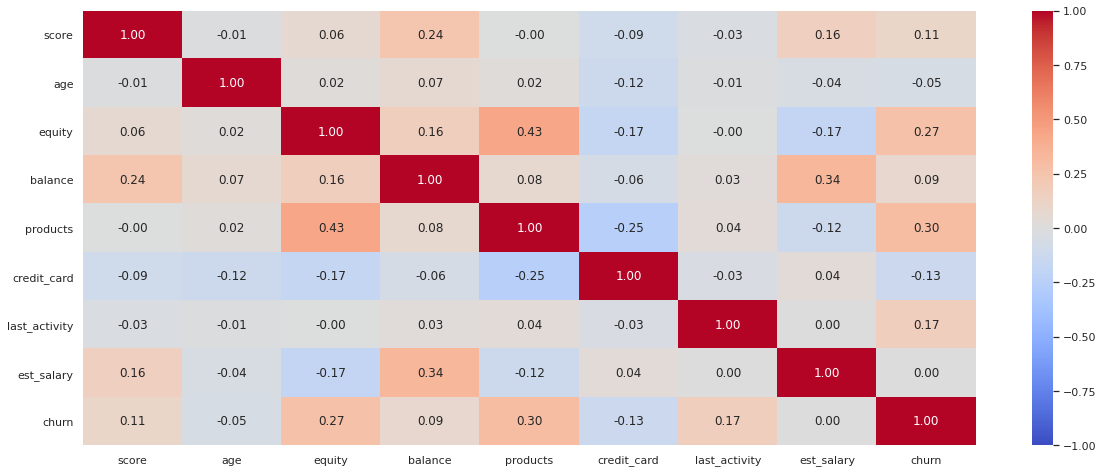

In [ ]:
#расчет корреляций и графическое представление корреляций
df_1=df.drop(columns='user_id')
sns.set(rc = {'figure.figsize':(20, 8)})
sns.heatmap(df_1.corr(), vmin = -1, vmax = +1, annot = True, fmt = '0.2f',  cmap = 'coolwarm')

• По матрице корреляций можно сказать, что влияние на отток имеют такие признаки как количество используемых продуктов (слабая корреляция) и приблизительная оценка собственности клиента (слабая корреляция). Так же влияние имеют последнняя активность, наличие кредитной карты и банковский рейтинг (очень слабая корреляция).

• Признаков имеющих нулевую корреляцию достаточно много.

• Почти не влияют на уход клиентов возраст, баланс, заработная плата клиента.

• Так же мы видим, что приблизительная оценка собственности довольно сильно коррелирует с количеством продуктов, которыми пользуется клиент.

### Отток клиентов по сегментам

Количество пользователей в сегменте:  448


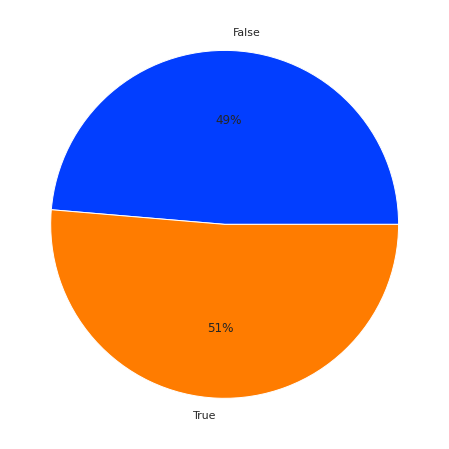

In [ ]:
#выделяем сегмент
data_1=df.query('gender == "М" and age_category=="взрослый" and products>=3')
dt=data_1.groupby('churn').agg({'user_id': 'count'}).reset_index()
a=data_1['user_id'].count()
dt['per']=dt['user_id']/ya*100
print('Количество пользователей в сегменте: ', a)

colors = sns.color_palette('bright')[ 0:5 ]
plt.pie(dt['per'], labels = dt['churn'], colors = colors, autopct='%.0f%%')
plt.show()

Количество пользователей в сегменте:  1049


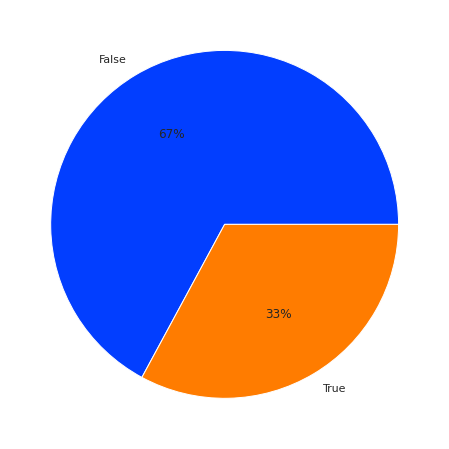

In [ ]:
#выделяем сегмент
data_1=df.query('city == "Ярославль" and credit_card==False and est_salary_category=="высокий достаток"')
dt=data_1.groupby('churn').agg({'user_id': 'count'}).reset_index()
a=data_1['user_id'].count()
dt['per']=dt['user_id']/rb*100
print('Количество пользователей в сегменте: ', a)

colors = sns.color_palette('bright')[ 0:5 ]
plt.pie(dt['per'], labels = dt['churn'], colors = colors, autopct='%.0f%%')
plt.show()

Количество пользователей в сегменте:  824


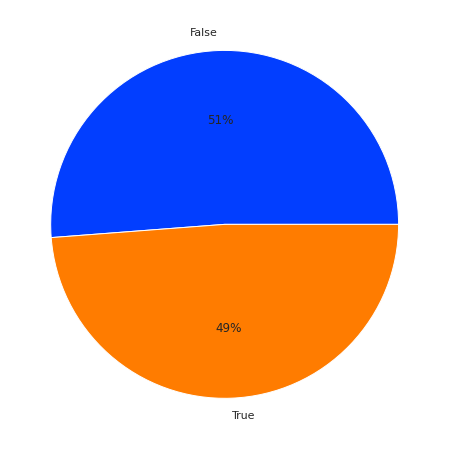

In [ ]:
#выделяем сегмент
data_1=df.query('products>=3 and est_salary_category=="высокий достаток" and balance_category=="более 100000"')
dt=data_1.groupby('churn').agg({'user_id': 'count'}).reset_index()
a=data_1['user_id'].count()
dt['per']=dt['user_id']/rb*100
print('Количество пользователей в сегменте: ', a)

colors = sns.color_palette('bright')[ 0:5 ]
plt.pie(dt['per'], labels = dt['churn'], colors = colors, autopct='%.0f%%')
plt.show()

Были выделены одни из наиболее отточных сегментов, ими оказались:  клиенты, использующие 3 и более продуктов, имеющие высокий достаток и на счету у которых более 100000; клиенты из Ярославля, не имеющие кредитной карты и с высоким уровнем дохода; клиенты мужского пола, использующие 3 и более продуктов и взрослого возраста.

- Вывод:

> К оттоку склонны клиенты мужского пола

> Самый большой отток клиентов наблюдается в Ярославле

> Клиенты, использующие от 1 до 2 продуктов, преимущественно остаются в банке

> В основном из банка уходят клиенты, относящиеся к категории "взрослый"(возраст 36-60 лет)

> В основном уходят клиенты, которые были активны в последнее время

> Больше всего уходит клиентов имеющих кредитную карту

## Проверка гипотез

### Сформулируем гипотезы:
- Нулевая: различия в возрасте между теми клиентами, которые ушли и теми, которые остались, не значительны
- Альтернативная: существуют различия в возрасте между теми клиентами, которые ушли и теми, которые остались

In [ ]:
#формирование выборок
s_1=df[df['churn']==True]['age']
s_2=df[df['churn']==False]['age']

8155

In [ ]:
#проверка гипотез
alpha = 0.05
results = st.mannwhitneyu(s_1, s_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [ ]:
#описательная статистика для выборок
df.pivot_table(index='churn', values='age', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
churn,,,,,,,,
False,34.0,40.0,51.0,8155.0,86.0,43.020846,18.0,12.375207
True,32.0,39.0,52.0,1819.0,79.0,41.450247,18.0,11.176459


Не удалось отвергнуть нулевую гипотезу об отсутствии различий в возрасте тех, кто ушел в отток и кто не ушел.

### Сформулируем гипотезы:
- Нулевая: различие в количестве используемых продуктов между теми клиентами, которые ушли и теми, которые остались, не значительно
- Альтернативная: существует различие в количестве используемых продуктов клиентами, которые ушли и теми, которые остались

In [ ]:
#формирование выборок
s_3=df[df['churn']==1]['products']
s_4=df[df['churn']==0]['products']

In [ ]:
#проверка гипотез
alpha = 0.05
results = st.mannwhitneyu(s_3, s_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  6.741137692868694e-162
Отвергаем нулевую гипотезу: разница статистически значима


In [ ]:
#описательная статистика для выборок
df.pivot_table(index='churn', values='products', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
churn,,,,,,,,
False,1.0,2.0,2.0,8180.0,5.0,1.757579,1.0,0.713371
True,2.0,2.0,3.0,1820.0,5.0,2.375824,0.0,0.923380


Не удалось отвергнуть нулевую гипотезу об отсутствии различий в возрасте тех, кто ушел в отток и кто не ушел. Среднее значение используемых продуктов для оставшихся и ушедших дейстивтельно отличается приблизительно на 0.5.

## Вывод

- В ходе работы была проведена работа с данными о клиентах банка для выявления причин оттока клиента. По итогам исследования был выведен такой портрет клиентов склонных и не склонных к оттоку:

- Признаки клиентов, которые склонны уходить в отток:

> К оттоку склонны клиенты мужского пола

> Самый большой отток клиентов наблюдается в Ярославле

> Клиенты, использующие от 1 до 2 продуктов, преимущественно остаются в банке

> В основном из банка уходят клиенты, относящиеся к категории "взрослый"(возраст 36-60 лет)

> В основном уходят клиенты, которые были активны в последнее время

> Больше всего уходит клиентов, имеющих кредитную карту

- Признаки клиентов, которые не склонны уходить в отток:

> В банке остаются преимущественно женщины

> Больше всего клиентов остается в Рыбинске и Ростове

> Клиенты, использующие от 3 до 5 продуктов, преимущественно уходят в банке

> В основном в банке остаются клиенты, относящиеся к категории "старый"(возраст более 61 года) и "молодой"(возраст 18-35 лет)

> Больше всего остается клиентов, не имеющих кредитную карту

- Были выделены одни из наиболее оотточные сегментов, ими оказались:  клиенты, использующие 3 и более продуктов, имеющие высокий достаток и на счету у которых более 100000; клиенты из Ярославля, не имеющие кредитной карты и с высоким уровнем дохода; клиенты мужского пола, использующие 3 и более продуктов и взрослого возраста.

- Были проверены гипотезы: различие в количестве используемых продуктов между теми клиентами, которые ушли и теми, которые остались, не значительно и различия в возрасте между теми клиентами, которые ушли и теми, которые остались, не значительны.Обе гипотезы не подтвердились.

- Рекомендации
В ходе анализа были выявлены аномалии: большое количесво пропусков в данных, что может влиять на результаты анализа и свидетельствовать об ошибке в системе обработки клиентов. Стоит ориентировать работу банков на работу с молодежью и людьми старшего поколения. Провести опрос, выяснить что не так и сделать выпуск кредитных карт на более выгодных условиях, чтобы клиенты оставались. Предлагать большое количество продуктов банка на выгодных условиях.

Дашборд- https://public.tableau.com/views/_16793308427250/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link
https://public.tableau.com/app/profile/olga8168/viz/_16793308427250/Dashboard1#2